In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
import random
import math
import matplotlib.animation as FuncAnimation
import matplotlib
#import pylab as p
import matplotlib.animation as manimation; manimation.writers.list()

%matplotlib notebook
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import odeint

from matplotlib import animation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

###########################################################################################################
rng = np.random.default_rng(156421)
nfr = 300 # Number of frames
time = 80 #time for the animation
fpss = nfr/(time/5) #frames per second, due to above

#expansion of space
space0 = 50 #initial size of space
A = 1.1 #velocity of space expanding
n = 3000

#galaxy 1
rng = np.random.default_rng(7)
c1 = [-25,0,-10]
v1 = [0,0,0]
x1 = np.random.normal(c1[0], 10, n)
y1 = np.random.normal(c1[1], 7.8, n)
z1 = np.random.normal(c1[2], 0.1, n) # - space0 + 1
r1 = np.sqrt((x1-c1[0])**2+(y1-c1[1])**2)
theta1 = rng.integers(low=0, high=360, size=n)
psy1 = rng.integers(low=0, high=360, size=1)*np.pi/360

#galaxy 2
rng = np.random.default_rng(3)
c2 = [30,20,-15]
v2 = [0,0,0]
x2 = np.random.normal(c2[0], 10, n)
y2 = np.random.normal(c2[1], 7.8, n)
z2 = np.random.normal(c2[2], 0.25, n) # - space0 + 1
r2 = np.sqrt((x2-c2[0])**2+(y2-c2[1])**2)
theta2 = rng.integers(low=0, high=360, size=n)
psy2 = rng.integers(low=0, high=360, size=1)*np.pi/360

#galaxy 3
rng = np.random.default_rng(2123)
c3 = [-20,-30,30]
v3 = [0,0,0]
x3 = np.random.normal(c3[0], 10, n)
y3 = np.random.normal(c3[1], 7.8, n)
z3 = np.random.normal(c3[2], 5, n) # - space0 + 1
r3 = np.sqrt((x3-c3[0])**2+(y3-c3[1])**2)
theta3 = rng.integers(low=0, high=360, size=n)
psy3 = rng.integers(low=0, high=360, size=1)*np.pi/360


###########################################################################################################

def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point
    
    #applying the expansion of space
    expansion = space0 #+ A*num
    
    
    # for each particle
    for item in range(len(x1)):        
        #if r[item] < mr:
            #E[item] = -0.01 #attraction
        #elif r[item] > mr:
            #E[item] = 0.001 # expansion
        #
        x1[item] = c1[0] + v1[0]*num + (r1[item]) * ( math.cos( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1) 
        y1[item] = c1[1] + v1[1]*num + (r1[item]) * ( math.sin( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1)
        z1[item] = c1[2] + v1[2]*num + (r1[item]) * ( math.cos( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.cos(psy1)  
        #
        x2[item] = c2[0] + v2[0]*num + (r2[item]) * ( math.cos( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.sin(psy2) 
        y2[item] = c2[1] + v2[1]*num + (r2[item]) * ( math.sin( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.sin(psy2)
        z2[item] = c2[2] + v2[2]*num + (r2[item]) * ( math.cos( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.cos(psy2)
        #
        x3[item] = c3[0] + v3[0]*num + (r3[item]) * ( math.cos( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.sin(psy3) 
        y3[item] = c3[1] + v3[1]*num + (r3[item]) * ( math.sin( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.sin(psy3)
        z3[item] = c3[2] + v3[2]*num + (r3[item]) * ( math.cos( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.cos(psy3)

        #(t/24)*(2.1/np.sqrt(r[item])-0.4/r[item] + 0.8*r[item]**0.75)/2.5
        
    r11 = 1/np.sqrt(r1+0.01)
    dataSet1 = np.array([x1, y1, z1]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet1[0, :n], dataSet1[1, :n], dataSet1[2, :n], c=r11, s=5, cmap='cividis', norm = normalize)
    
    r22 = 1/np.sqrt(r2+0.01)
    dataSet2 = np.array([x2, y2, z2]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet2[0, :n], dataSet2[1, :n], dataSet2[2, :n], c=r22, s=5, cmap='cividis', norm = normalize)
    
    r33 = 1/np.sqrt(r3+0.01)
    dataSet3 = np.array([x3, y3, z3]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet3[0, :n], dataSet3[1, :n], dataSet3[2, :n], c=r33, s=5, cmap='cividis', norm = normalize)
    
    # Setting Axes Limits
    ax.set_xlim(-expansion, expansion)
    ax.set_ylim(-expansion, expansion)
    ax.set_zlim(-expansion, expansion)

    # Adding Figure Labels
    ax.set_title('Galaxy SIM \nTime = ' + str(np.round(num/20, decimals=1)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

###########################################################################################################
# Plotting the Animation
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_box_aspect([1,1,1])   
ax.view_init(20, 45)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

###########################################################################################################
anim = animation.FuncAnimation(fig, animate_func, interval=time,   frames=nfr)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

# Saving the Animation
#f = r"C:\Users\Markb\galaxy.gif"
#writergif = animation.PillowWriter(fps=fpss)
#anim.save(f, writer=writergif)

#anim.save('galaxy.mp4', fps=fpss, extra_args=['-vcodec', 'libx264'])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl
import random
import math
import matplotlib.animation as FuncAnimation
import matplotlib
#import pylab as p
import matplotlib.animation as manimation; manimation.writers.list()

%matplotlib notebook
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import odeint

from matplotlib import animation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [ ]:
###########################################################################################################
nfr = 60 # Number of frames
time = 60 #time for the animation
fpss = nfr/(time/5) #frames per second, due to above

#expansion of space

space0 = 100 #initial size of space
A = 1.1 #velocity of space expanding
n = 3000
m = 4
data = pd.DataFrame()
x = []
y = []
z = []
c = []
v = []

In [6]:
for i in range(m):
    rng = np.random.default_rng(i*3)
    c1 = [np.random.normal(random.randint(-30, 30), 10, 1)[0], np.random.normal(random.randint(-30, 30), 10, 1)[0], np.random.normal(random.randint(-30, 30), 10, 1)[0]]
    #c = [0,0,0]
    #v = [0,0,0]
    v1 = [np.random.normal(0, 0.25, 1)[0], np.random.normal(0, 0.25, 1)[0], np.random.normal(0, 0.25, 1)[0]]
    for j in range(n):
        x1 = np.random.normal(c1[0], 10, 1)[0]
        y1 = np.random.normal(c1[1], 7.8, 1)[0]
        z1 = np.random.normal(c1[2], 0.1, 1)[0]
        x.append(x1)
        y.append(y1)
        z.append(z1)
        c.append(c1)
        v.append(v1)


data.insert(0,'xval',x)
data.insert(1,'yval',y)
data.insert(2,'zval',z)

r1 = np.sqrt((data['xval']-c1[0])**2+(data['yval']-c1[1])**2)
theta1 = rng.integers(low=0, high=360, size=m*n)
psy1 = rng.integers(low=0, high=360, size=1)*np.pi/360


###########################################################################################################

def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point
    
    #applying the expansion of space
    expansion = space0 #+ A*num
    
    
    for j in range(m):
        
        for i in range(j*n,(j+1)*n):        
        #
            data['xval'][i] #= c[j][0] #+ v[j][0]*num + (r1[i])# * ( math.cos( theta1[i] + (num/62) * ( 2.1/np.sqrt(r1[i])-0.4/r1[i] + 0.8*r1[i]**0.75)/2.5 )) * np.sin(psy1) 
            data['yval'][i] #= c[j][1] #+ v[j][1]*num + (r1[i])# * ( math.sin( theta1[i] + (num/62) * ( 2.1/np.sqrt(r1[i])-0.4/r1[i] + 0.8*r1[i]**0.75)/2.5 )) * np.sin(psy1)
            data['zval'][i] #= c[j][2] #+ v[j][2]*num + (r1[i])# * ( math.cos( theta1[i] + (num/62) * ( 2.1/np.sqrt(r1[i])-0.4/r1[i] + 0.8*r1[i]**0.75)/2.5 )) * np.cos(psy1)  
        
    #r11 = 1/np.sqrt(r1+0.01)
    #datag = np.array([data['xval'], data['yval'], data['zval']]) 
    #normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(data['xval'], data['yval'], data['zval'])#, c=r11, s=5, cmap='cividis', norm = normalize)
    
    # Setting Axes Limits
    ax.set_xlim(-expansion, expansion)
    ax.set_ylim(-expansion, expansion)
    ax.set_zlim(-expansion, expansion)

    # Adding Figure Labels

###########################################################################################################
# Plotting the Animation
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_box_aspect([1,1,1])   
ax.view_init(20, 45)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

###########################################################################################################
anim = animation.FuncAnimation(fig, animate_func, interval=time,   frames=nfr)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

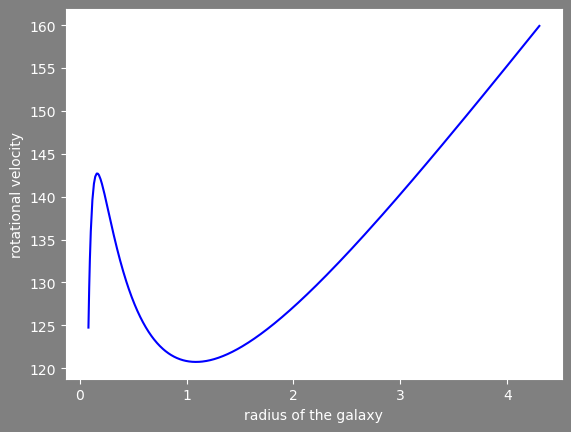

In [26]:
#expansion of space
space0 = 3 #initial size of space
A = 1.1 #velocity of space expanding

# particles
n = 1000
x = np.random.normal(0, 1.2, n)
y = np.random.normal(0, 0.8, n)
r = np.sqrt(x**2+y**2)
r.sort()
rng = np.random.default_rng(6452341)
theta = rng.integers(low=0, high=360, size=n)

X = range(0,n)
V = np.zeros(n)
    #for each particle
for t in range(0,30):
    for item in range(len(V)):
        #theta[item] = theta[item]
        V[item] = 100*(t/24)*(2.1/np.sqrt(r[item])-0.4/r[item] + 0.8*r[item]**0.75)/2.5# + 1/np.sqrt(max(r)-r[item])+0.01 )
        


#print(r)
#print(V)

fig = plt.figure()
ax = plt.subplot(111)
ax.set_facecolor('white')
fig.set_facecolor('grey')
plt.plot(r,V, color='blue')
#ax = plt.axes()
#ax.set_facecolor('white') 
plt.xlabel("radius of the galaxy")
plt.ylabel("rotational velocity")
plt.savefig('galaxy_curve.png')

In [499]:
class point:
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z

class body:
    def __init__(self, location, mass, velocity, name = ""):
        self.location = location
        self.mass = mass
        self.velocity = velocity
        self.name = name
        
def calculate_single_body_acceleration(bodies, body_index):
    G_const = 6.67408e-11 #m3 kg-1 s-2
    acceleration = point(0,0,0)
    target_body = bodies[body_index]
    for index, external_body in enumerate(bodies):
        if index != body_index:
            r = (target_body.location.x - external_body.location.x)**2 + (target_body.location.y - external_body.location.y)**2 + (target_body.location.z - external_body.location.z)**2
            r = math.sqrt(r)
            tmp = G_const * external_body.mass / r**3
            acceleration.x += tmp * (external_body.location.x - target_body.location.x)
            acceleration.y += tmp * (external_body.location.y - target_body.location.y)
            acceleration.z += tmp * (external_body.location.z - target_body.location.z)

    return acceleration

def compute_velocity(bodies, time_step = 1):
    for body_index, target_body in enumerate(bodies):
        acceleration = calculate_single_body_acceleration(bodies, body_index)
        target_body.velocity.x += acceleration.x * time_step
        target_body.velocity.y += acceleration.y * time_step
        target_body.velocity.z += acceleration.z * time_step 

def update_location(bodies, time_step = 1):
    for target_body in bodies:
        target_body.location.x += target_body.velocity.x * time_step
        target_body.location.y += target_body.velocity.y * time_step
        target_body.location.z += target_body.velocity.z * time_step
        
def compute_gravity_step(bodies, time_step = 1):
    compute_velocity(bodies, time_step = time_step)
    update_location(bodies, time_step = time_step)
    

def run_simulation(bodies, names = None, time_step = 1, number_of_steps = 10000, report_freq = 100):

    #create output container for each body
    body_locations_hist = []
    for current_body in bodies:
        body_locations_hist.append({"x":[], "y":[], "z":[], "name":current_body.name})
        
    for i in range(1,number_of_steps):
        compute_gravity_step(bodies, time_step = 1000)            
        
        if i % report_freq == 0:
            for index, body_location in enumerate(body_locations_hist):
                body_location["x"].append(bodies[index].location.x)
                body_location["y"].append(bodies[index].location.y)           
                body_location["z"].append(bodies[index].location.z)       

    return body_locations_hist



def plot_output(bodies, outfile = None):
    fig = plot.figure()
    colours = ['r','b','g','y','m','c']
    ax = fig.add_subplot(1,1,1, projection='3d')
    max_range = 0
    for current_body in bodies: 
        max_dim = max(max(current_body["x"]),max(current_body["y"]),max(current_body["z"]))
        if max_dim > max_range:
            max_range = max_dim
        ax.plot(current_body["x"], current_body["y"], current_body["z"], c = random.choice(colours), label = current_body["name"])        
    
    ax.set_xlim([-max_range,max_range])    
    ax.set_ylim([-max_range,max_range])
    ax.set_zlim([-max_range,max_range])
    ax.legend()        

    if outfile:
        plot.savefig(outfile)
    else:
        plot.show()
        
        
        
        
#planet data (location (m), mass (kg), velocity (m/s)
sun = {"location":point(0,0,0), "mass":2e30, "velocity":point(0,0,0)}
mercury = {"location":point(0,5.7e10,0), "mass":3.285e23, "velocity":point(47000,0,0)}
venus = {"location":point(0,1.1e11,0), "mass":4.8e24, "velocity":point(35000,0,0)}
earth = {"location":point(0,1.5e11,0), "mass":6e24, "velocity":point(30000,0,0)}
mars = {"location":point(0,2.2e11,0), "mass":2.4e24, "velocity":point(24000,0,0)}
jupiter = {"location":point(0,7.7e11,0), "mass":1e28, "velocity":point(13000,0,0)}
saturn = {"location":point(0,1.4e12,0), "mass":5.7e26, "velocity":point(9000,0,0)}
uranus = {"location":point(0,2.8e12,0), "mass":8.7e25, "velocity":point(6835,0,0)}
neptune = {"location":point(0,4.5e12,0), "mass":1e26, "velocity":point(5477,0,0)}
pluto = {"location":point(0,3.7e12,0), "mass":1.3e22, "velocity":point(4748,0,0)}

if __name__ == "__main__":

    #build list of planets in the simulation, or create your own
    bodies = [
        body( location = sun["location"], mass = sun["mass"], velocity = sun["velocity"], name = "sun"),
        body( location = earth["location"], mass = earth["mass"], velocity = earth["velocity"], name = "earth"),
        body( location = mars["location"], mass = mars["mass"], velocity = mars["velocity"], name = "mars"),
        body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "venus"),
        ]
    
    motions = run_simulation(bodies, time_step = 100, number_of_steps = 80000, report_freq = 1000)
    plot_output(motions, outfile = 'orbits.png')

NameError: name 'plot' is not defined

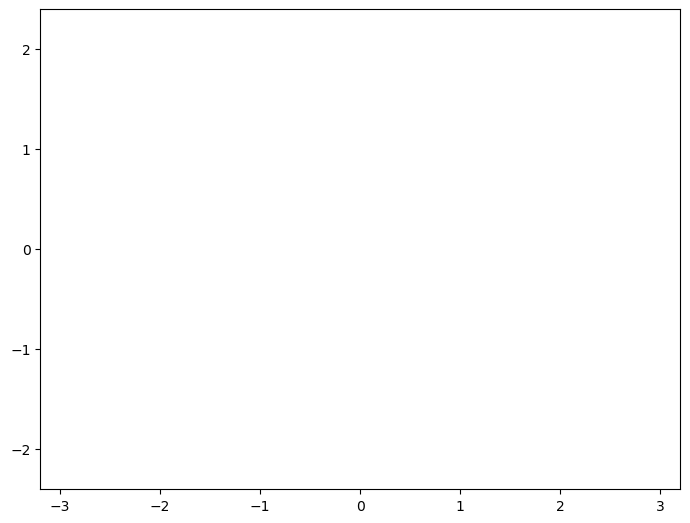

In [6]:

from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

Locator attempting to generate 1927 ticks ([-116.69999999999999, ..., -1.1399999999999864]), which exceeds Locator.MAXTICKS (1000).


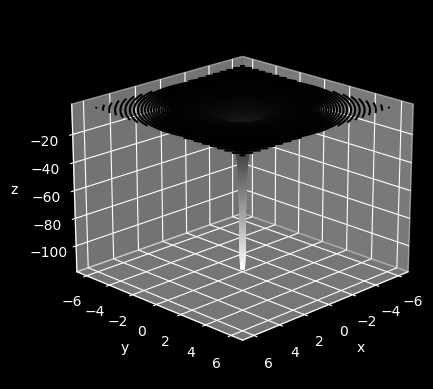

In [27]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points


def f(x, y):
    return -10/np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.contour3D(X, Y, Z, 2000, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.view_init(20, 45)

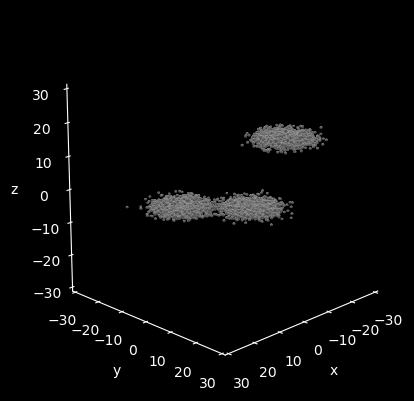

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

m = 3
list_center = []
list_radius = []
for i in range(m):
    c = [np.random.normal(0, 10, 1)[0], np.random.normal(0, 10, 1)[0], np.random.normal(0, 10, 1)[0]]
    n = 3000
    for i in range(n):
        x1 = np.random.normal(c[0], 3.5, 1)[0]
        y1 = np.random.normal(c[1], 3.5, 1)[0]
        z1 = np.random.normal(c[2], 0.5, 1)[0]
        list_center.append([x1,y1,z1])
        #init_center = [(1,2,3),(-4,-5,6), (5,5,6)]
        list_radius.append(abs(np.random.normal(0.4, 0.01, 1)[0]))




def plt_sphere(list_center, list_radius):
    ax = plt.axes(projection='3d', xlim=(-30,30),ylim=(-30,30),zlim=(-30,30))
    for c, r in zip(list_center, list_radius):
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        x = r*np.cos(u)*np.sin(v)
        y = r*np.sin(u)*np.sin(v)
        z = r*np.cos(v)
        ax.plot_surface(x-c[0], y-c[1], z-c[2], color = "white")
        

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(20, 45)
    ax.set_box_aspect([1,1,1])
    ax.set_facecolor('black') 
    ax.grid(False) 
    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

fig = plt.figure()
plt_sphere(list_center, list_radius) 
fig.set_facecolor('black')


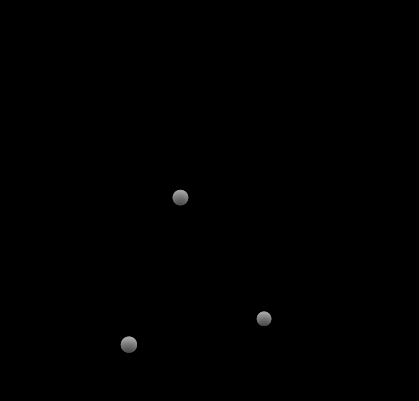

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

m = 3
list_center = []
list_radius = []
v = []
for i in range(m):
    c = [np.random.normal(0, 5, 1)[0], np.random.normal(0, 5, 1)[0], np.random.normal(0, 5, 1)[0]]
    n = 1
    for i in range(n):
        x1 = np.random.normal(c[0], 3.5, 1)[0]
        y1 = np.random.normal(c[1], 3.5, 1)[0]
        z1 = np.random.normal(c[2], 0.5, 1)[0]
        m1 = np.random.normal(1, 0.25, 1)[0]
        list_center.append([x1,y1,z1,m1])
        vx = np.random.normal(0, 1.5, 1)[0]
        vy = np.random.normal(0, 1.5, 1)[0]
        vz = np.random.normal(0, 1.5, 1)[0]
        v.append([vx,vy,vz])
        #init_center = [(1,2,3),(-4,-5,6), (5,5,6)]
        list_radius.append(abs(np.random.normal(0.75, 0.1, 1)[0]))


def move(list_center,time):
    for _ in range(time):
        for i in range(len(list_center)):
            list_center[i][0] = list_center[i][0] + v[i][0]
            list_center[i][1] = list_center[i][1] + v[i][1]
            list_center[i][2] = list_center[i][2] + v[i][2]
    return(list_center)

        
        
def plt_sphere(list_center, list_radius, time):
    
    for i in range(time):
    
        ax = plt.axes(projection='3d', xlim=(-10,10),ylim=(-10,10),zlim=(-10,10))
        for c, r in zip(list_center, list_radius):
            u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
            x = r*np.cos(u)*np.sin(v)
            y = r*np.sin(u)*np.sin(v)
            z = r*np.cos(v)
            ax.plot_surface(x-c[0], y-c[1], z-c[2], color = "white")


        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.view_init(20, 45)
        ax.set_box_aspect([1,1,1])
        ax.set_facecolor('black') 
        ax.grid(False) 
        ax.w_xaxis.pane.fill = False
        ax.w_yaxis.pane.fill = False
        ax.w_zaxis.pane.fill = False
        ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
        ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
        ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
        move(list_center,1)
    
fig = plt.figure()
plt_sphere(list_center,list_radius,3)
fig.set_facecolor('black')



In [ ]:
#initial hastighed
#hastighed ændring
#for hvert object, beregn tyngdekraft ændring
#find afstand mellem objecter
#tyngdekraft
#expansion of space

In [3]:
import numpy as np
m = 1
mid = 10
list_center = []
list_radius = []
v = []
for i in range(m):
    c = [np.random.normal(0, 10, 1)[0], np.random.normal(0, 10, 1)[0], np.random.normal(0, 10, 1)[0]]
    n = 1000
    for i in range(n):
        x1 = np.random.normal(c[0], 50, 1)[0]
        y1 = np.random.normal(c[1], 50, 1)[0]
        z1 = np.random.normal(c[2], 2, 1)[0]
        q1 = abs(np.random.normal(mid, 5, 1)[0])
        q2 = -abs(np.random.normal(mid, 2, 1)[0])
        list_center.append([x1,y1,z1,q1,q2])
        vx = np.random.normal(0, 1, 1)[0]
        vy = np.random.normal(0, 1, 1)[0]
        vz = np.random.normal(0, 1, 1)[0]
        v.append([vx,vy,vz])
        list_radius.append(abs(np.random.normal(5, 1, 1)[0]))



In [4]:
def move(time):
    for _ in range(time):
        for i in range(len(list_center)):
            vx = v[i][0]
            vy = v[i][1]
            vz = v[i][2]
            for j in range(len(list_center)):
                if i == j:
                    next
                elif i != j:
                    R = np.sqrt( (list_center[i][0]-list_center[j][0])**2 + (list_center[i][1]-list_center[j][1])**2 + (list_center[i][2]-list_center[j][2])**2 )
                #positiv - positiv
                    force = 0.99*((list_center[i][3]*list_center[j][3])+(list_center[i][4]*list_center[j][4]))/R - (list_center[i][4]*list_center[j][3]-list_center[i][3]*list_center[j][4])/np.sqrt(R) + R/1000
                                
                    if R <= list_radius[i]:
                        force = 0
                        vx = 0
                        vy = 0
                        vz = 0
                    elif R > list_radius[i]:

                        vx = vx + -(list_center[i][0]-list_center[j][0])/R * force
                        vy = vy + -(list_center[i][1]-list_center[j][1])/R * force
                        vz = vz + -(list_center[i][2]-list_center[j][2])/R * force
                    
            list_center[i][0] = list_center[i][0] + vx
            list_center[i][1] = list_center[i][1] + vy
            list_center[i][2] = list_center[i][2] + vz
    return(list_center) 

In [1]:
  
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point
    
    for c, r in zip(list_center, list_radius):
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        x = r*np.cos(u)*np.sin(v)
        y = r*np.sin(u)*np.sin(v)
        z = r*np.cos(v)
        ax.plot_surface(x-c[0], y-c[1], z-c[2], color = "white")
    
    ax.set_xlim(-expansion, expansion)
    ax.set_ylim(-expansion, expansion)
    ax.set_zlim(-expansion, expansion)
    move(1)
    # Setting Axes Limits


###########################################################################################################
# Plotting the Animation
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_box_aspect([1,1,1])   
ax.view_init(20, 40)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False)
expansion = 200
ax.set_xlim(-expansion, expansion)
ax.set_ylim(-expansion, expansion)
ax.set_zlim(-expansion, expansion)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))


###########################################################################################################
anim = animation.FuncAnimation(fig, animate_func, interval=100,   frames=400)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

NameError: name 'plt' is not defined

In [36]:
import numpy as np
from scipy.stats import norm

#defining a normal distribution
N = norm.cdf

#call price function, sigma=volatility(σ)
def BSM_call_price(S, K , r , T , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T)) 
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T) * N(d2) 

#put price function, sigma = volatility(σ)
def BSM_put_price(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * N(-d2) - S * N(-d1)

#S = current stock price
#K = strike
#r = risk-free interest
#T = time to expiration (days/252)
#sigma = volatility 

def imp_vol(S, K , r , T ,market_price):
        price_difference = 0.001
        volatility = 0.2
        step = 0.001
      
        for i in range(1000): 
            call_price = BSM_call_price(S, K, r, T, sigma = volatility)
            difference = market_price - call_price
            if difference > price_difference:
                volatility = volatility + step
            elif difference < 0 and abs(difference) > price_difference:
                volatility = volatility - step
            elif abs(difference) < price_difference:
                return volatility
        return volatility #if best value not found

In [ ]:
imp_vol(27.39,18,0.05,1/365,8.9) #dato i 1= år

-1.5959455978986625e-16